# Professional Baseball Salary Analysis

My daughter recently decided she wants to become a professional softball player.  This seems like a fairly reasonable decision after her one year of playing.  Her skills are still very raw, and she will need a lot of practice.  In order to maximize her earning potential, I want to look at salaries of professional baseball players and see what skills are most valued when it comes to salary.

All data for this analysis was taken from the database provided by Sean Lahman.  This database includes information for professional baseball players from 1871 through the end of the 2016 season.  The database can be accessed at the following link, http://www.seanlahman.com/baseball-archive/statistics/

Please note that all analyses provided below are not intended to provide or claim actual cause and effect relationships.  I will examine overall trends in data, but these trends, if they exist, do not mean the two factors are actually related to one another.  A much more detailed analysis would need to be conducted to determine those kinds of relationships.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salaries = pd.read_csv('C:\Users\Burky\Desktop\Intro to Data Analysis\project\Salaries.csv')
pitching = pd.read_csv('C:\Users\Burky\Desktop\Intro to Data Analysis\project\Pitching.csv')
batting = pd.read_csv('C:\Users\Burky\Desktop\Intro to Data Analysis\project\Batting.csv')
fielding = pd.read_csv('C:\Users\Burky\Desktop\Intro to Data Analysis\project\Fielding.csv')

## Average Yearly Salary

To start off we'll look at the mean salary by year to get an idea of the trend for average salaries.

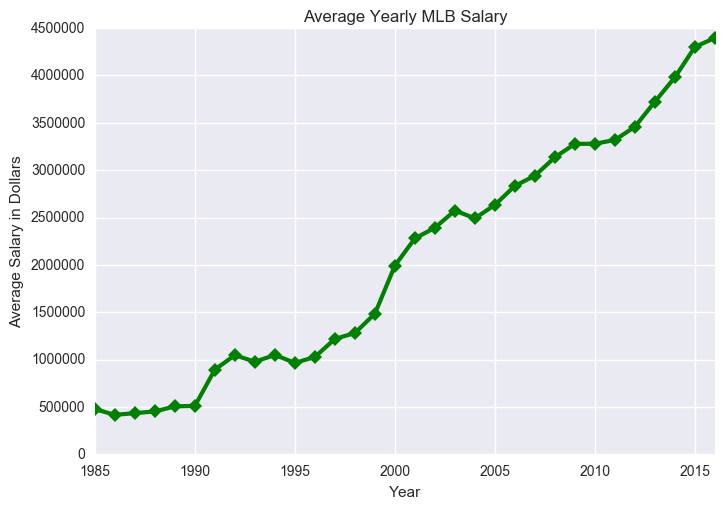

In [51]:
average_salaries_by_year = salaries.groupby('yearID')['salary'].mean()
average_salaries_by_year.plot(color='green', linewidth=3, marker='D')
plt.title('Average Yearly MLB Salary')
plt.ylabel('Average Salary in Dollars')
plt.xlabel('Year')

So, the average salary has jumped by nearly $4 million over the past 20 years.  That definitely seems promising for my daughter.  I'm not sure professional softball players make the same, but hopefully the trend is similar.  If not, I can always try convincing her to pick up baseball instead and work to become the first female professional baseball player.

Next, let's take a look at average salary by position.  Maybe there is one position that earns more than others.

## Salary by Position

In [4]:
salary_by_position = pd.merge(fielding, salaries, how='left', on=['playerID', 'yearID'])

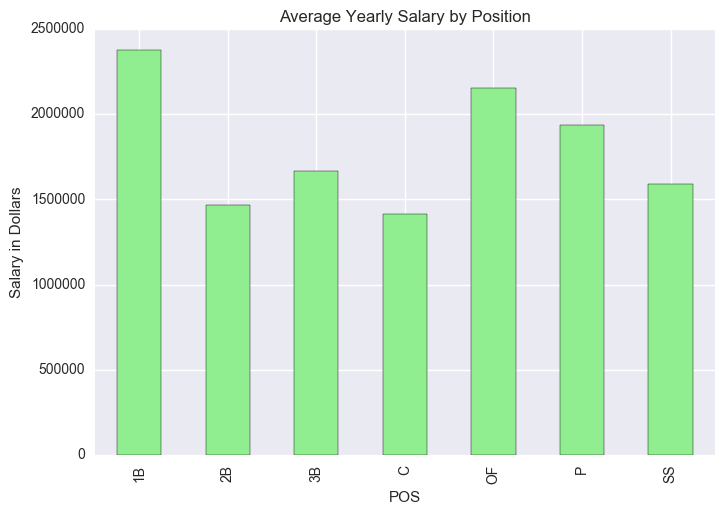

In [50]:
salary_breakdown = salary_by_position.groupby('POS')['salary'].mean()
salary_breakdown.plot.bar(color='lightgreen')
plt.title('Average Yearly Salary by Position')
plt.ylabel('Salary in Dollars')

It appears that first basemen, outfielders and pitchers are the highest paid players.

First basemen are typically the power hitters on a team, and not known for their speed or defensive prowess.  Catchers, who are the lowest paid position, tend to be the poorest hitters on a team.  This leads me to wonder whether or not certain offensive statistics lead to potentially higher salaries.

## Offensive Statistics and Salary

### Homeruns

Let's take a look at homeruns and how the number of homeruns hit per year compares to salary.

In [6]:
hitting_and_salary = batting.merge(salaries, how='inner', on=['playerID', 'yearID'])

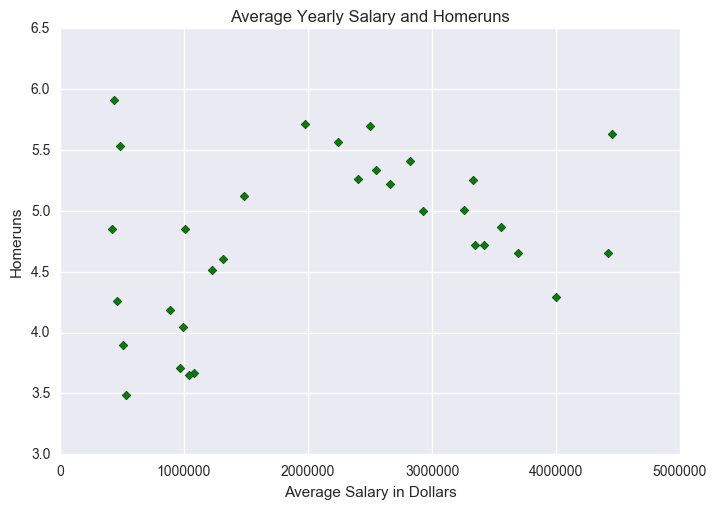

In [49]:
homerun_analysis = hitting_and_salary.groupby('yearID')['HR', 'salary'].mean()
homerun_analysis.plot.scatter(x='salary', y='HR', color='green', marker='D')
plt.title('Average Yearly Salary and Homeruns')
plt.xlabel('Average Salary in Dollars')
plt.ylabel('Homeruns')

Based on this data, there appears to be no real relationship between homeruns and salary.  The year with the most homeruns had very similar salary to the year with the lowest homeruns, and all data points are fairly mixed based on salary and homeruns.  Just to be sure, let's take a look at the top 50 homerun hitters, and compare their salaries.

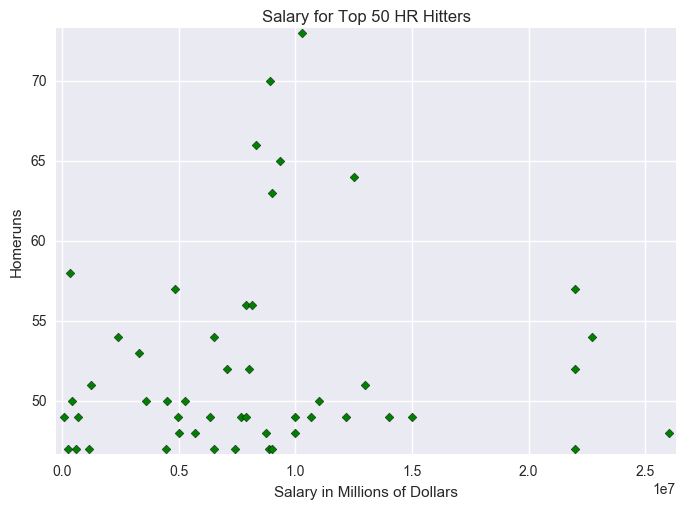

In [48]:
hr_focus = hitting_and_salary.nlargest(50, 'HR')
hr_focus.plot.scatter(x='salary', y='HR', color='green', marker='D')
plt.title('Salary for Top 50 HR Hitters')
plt.xlabel('Salary in Millions of Dollars')
plt.ylabel('Homeruns')
plt.margins(0.0125)

Looking at the best homerun hitters, there appears to be no discernable correlation between salary and homeruns.  The players with the most homeruns had about average salaries compared to the others in this group, while some towards the bottom for homeruns were the highest paid.

### Hits

So hitting for power does not seem to have an impact on salary, so let's take a look at total hits.  Maybe getting hits in general is more important than hitting the ball out of the park.

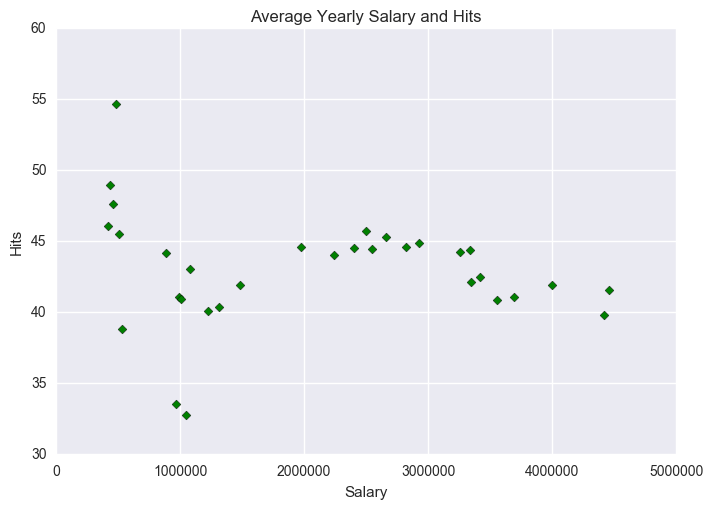

In [9]:
hits_analysis = hitting_and_salary.groupby('yearID')['H', 'salary'].mean()
hits_analysis.plot.scatter(x='salary', y='H', color='green', marker='D')
plt.title('Average Yearly Salary and Hits')
plt.xlabel('Salary in Dollars')
plt.ylabel('Hits')

The yearly averages for hits seems to be relatively stable, which shows it likely has little impact on average salary.  Again, let's take a look at the top 50 hitters to see if maybe there is a trend on an individual basis.

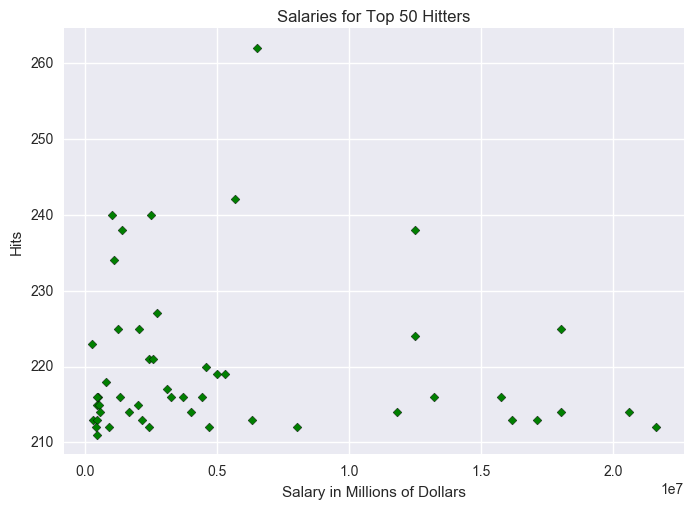

In [43]:
hitting_focus = hitting_and_salary.nlargest(50, 'H')
hitting_focus.plot.scatter(x='salary', y='H', color='green', marker='D')
plt.title('Salaries for Top 50 Hitters')
plt.xlabel('Salary in Millions of Dollars')
plt.ylabel('Hits')
plt.margins(0.05)

Again, we see a relatively flat graph, which shows little correlation between the total number of hits and salary.

Based on the information we've seen so far, salary does not appear to be highly based on offensive production.  Total hits and homeruns did not appear to have an influence on salary.  

## Pitching and Salary

### Yearly Averages

Now let's take a look at pitching stats, and how they compare with salaries.  The two specific stats we'll focus on here are ERA and Wins.  These two stats will likely overlap, since the more runs a pitcher gives up, the more likely they will lose games.  This is not always the case though, as a pitcher might have a high ERA, but plays for a team that provides more run support so he wins games regardless.

In [11]:
pitching_and_salary = pitching.merge(salaries, how='inner', on=['playerID', 'yearID'])

In [12]:
era_analysis = pitching_and_salary.groupby('yearID')['ERA', 'salary'].mean()

We will break the data down into yearly averages for salary and ERA.

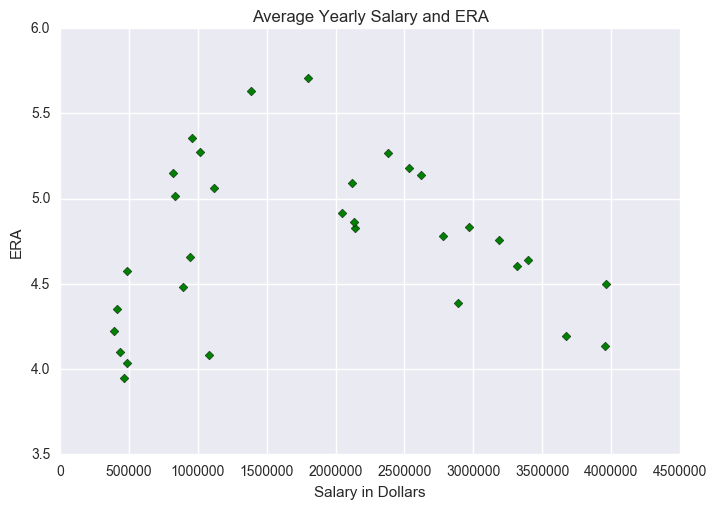

In [44]:
era_analysis.plot.scatter(x='salary', y='ERA', color='green', marker='D')
plt.title('Average Yearly Salary and ERA')
plt.ylabel('ERA')
plt.xlabel('Salary in Dollars')

This graph shows an odd trend in ERA and salaries.  The years with the lowest salary had relatively low ERA's.  In the middle we see a spike in ERA and salary, and then an ending decrease in ERA as we approach our max salary.

The other pitching stat I wanted to focus on was simply the number of wins and how this compares to salary.  It would be expected that pitchers with the most wins would earn the highest salary, since baseball is about winning.

In [14]:
w_analysis = pitching_and_salary.groupby('yearID')['W', 'salary'].mean()

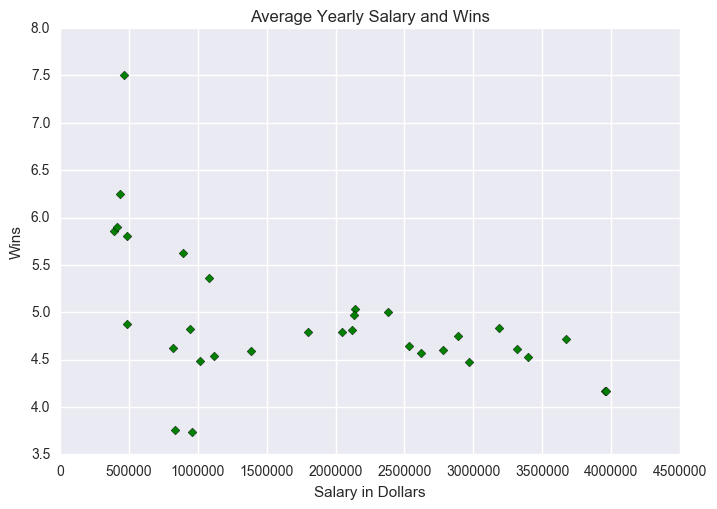

In [45]:
w_analysis.plot.scatter(x='salary', y='W', color='green', marker='D')
plt.title('Average Yearly Salary and Wins')
plt.ylabel('Wins')
plt.xlabel('Salary in Dollars')

Based on this information, it appears that the number of wins really does not have an impact on salary.  Most of the yearly averages are around 5 wins, with the highest mean salary coming in a year with one of the lowest mean number of wins.

### Individual Pitching

Now that we've looked at the pitching information on a yearly average, let's take a look at a select group of players to see if that changes the results we found.  I will still focus on ERA and wins, but will focus on the 50 highest paid pitchers.

In [16]:
era_focus = pitching_and_salary.nlargest(50, 'salary')

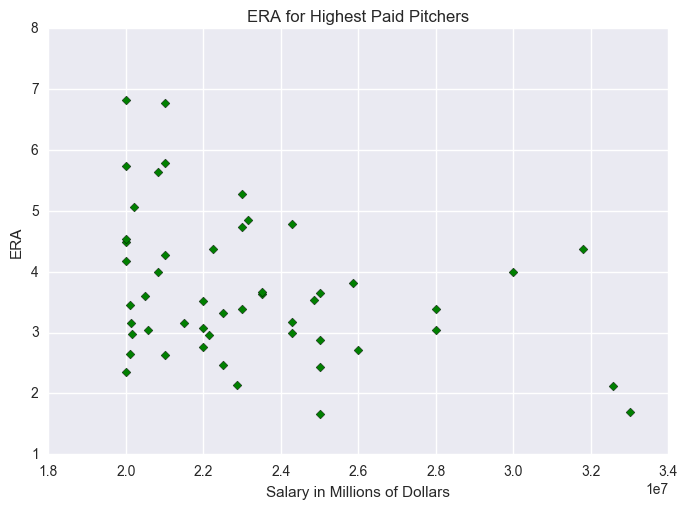

In [46]:
era_focus.plot.scatter(x='salary', y='ERA', color='green', marker='D')
plt.title('ERA for Highest Paid Pitchers')
plt.xlabel('Salary in Millions of Dollars')

Comparing the 50 highest paid pitchers, it appears that ERA may have some impact on overall salary, but based on the available data it would be hard to be certain.

In [18]:
w_focus = pitching_and_salary.nlargest(50, 'salary')

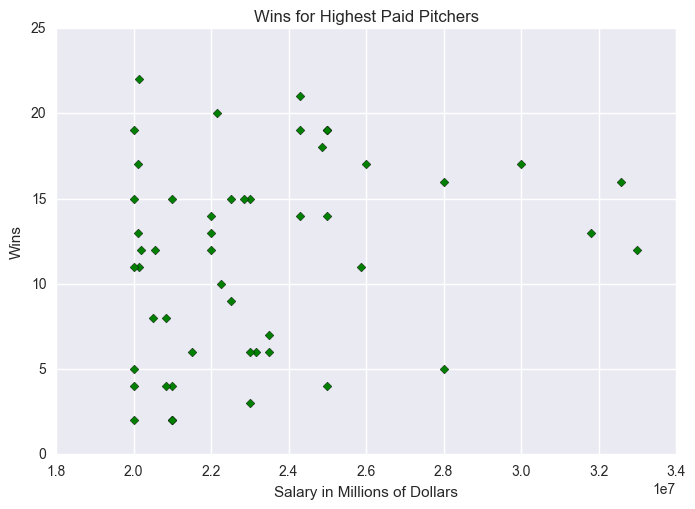

In [47]:
w_focus.plot.scatter(x='salary', y='W', color='green', marker='D')
plt.title('Wins for Highest Paid Pitchers')
plt.ylabel('Wins')
plt.xlabel('Salary in Millions of Dollars')

As with ERA, the wins for our 50 highest paid pitcher show there is no significant relationship between wins and salary.  A pitcher with over 20 wins earned about the same as a pitcher with 2 wins, while a pitcher with 12 wins was the highest paid of them all.

## Conclusion

Based on the data examined so far hitting and pitching stats do not appear to have any influence, either positive or negative on salary for professional baseball players.  There did appear to be a correlation between the position played and average salary, however, the analysis done here is not enough to determine an actual causal relationship between the two.

To determine a causal relationship, a more extensive experiment would need to be conducted that controls for all variables other than position.  This would mean all players would have to have similar hitting and fielding stats, and play for teams with similar market sizes to ensure no other factors are contributing to differences in salaries.  In an environment as varied as professional baseball this would be difficult to achieve.

Future research could focus on other potential variables, such as batting average, on base percentage, or the win/loss ratio for pitchers to determine if other factors have possible impact on salary.  Another potential study could look at salaries for a limited number of years.  This study looked at all available salary data, which is over 30 years worth of data.  The average salary has increased by over $4 million over that time, so a smaller sample size may show trends which are not evident in the larger dataset.

Another possible direction to study would be what physical characteristics are common for each position.  1st basemen appear to make significantly more money than catchers, so it would be interesting to examine the common physical characteristics for both positions and determine if there are any physical traits that would lead to an individual being better suited for one or the other position.

As a parent, this means that instead of focusing on a specific skill with my daughter to maximize her earning potential, I should simply be focusing on helping her improve overall to improve her ability level and improve her chances of realizing this dream.  An average salary of nearly $4.5 million last year means that professional baseball could be a very lucrative profession if you have the talent and ability.